In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

In [2]:
df = pd.read_csv('xy_data.csv')
print("Data loaded successfully.")
print(f"Total points: {len(df)}")
df.head()

Data loaded successfully.
Total points: 1500


,x,y
0,88.364456,57.784378
1,74.283936,54.406780
2,60.256474,46.311462
3,82.134370,57.717567
4,101.036390,67.849340


In [3]:
# --- Step 2: Prepare Data ---
x_obs = df['x'].values
y_obs = df['y'].values
t_vals = np.linspace(6, 60, len(df)) 

In [4]:

# --- Step 3: Define Model ---
def predict(params, t):
    theta, M, X = params
    x_pred = t*np.cos(theta) - np.exp(M*np.abs(t))*np.sin(0.3*t)*np.sin(theta) + X
    y_pred = 42 + t*np.sin(theta) + np.exp(M*np.abs(t))*np.sin(0.3*t)*np.cos(theta)
    return x_pred, y_pred

# --- Step 4: Define Objective Function (L1 distance) ---
def objective(params):
    x_pred, y_pred = predict(params, t_vals)
    return np.mean(np.abs(x_pred - x_obs) + np.abs(y_pred - y_obs))

# --- Step 5: Define Parameter Bounds ---
bounds = [
    (0.0, 50*np.pi/180),   # θ in radians (0° to 50°)
    (-0.05, 0.05),         # M
    (0.0, 100.0)           # X
]

In [5]:
# --- Step 6: Global Optimization (Differential Evolution) ---
print("\nRunning global optimization (this may take some time)...")
result_de = differential_evolution(objective, bounds, maxiter=1000, popsize=15, tol=1e-7)
print("\nGlobal optimization complete.")
print(f"Initial guess: {result_de.x}")


Running global optimization (this may take some time)...

Global optimization complete.
Initial guess: [4.90759285e-01 2.13890221e-02 5.49001508e+01]


In [6]:
# --- Step 7: Local Refinement (L-BFGS-B) ---
print("\nRunning local optimization (refinement)...")
result_local = minimize(objective, result_de.x, bounds=bounds, method='L-BFGS-B', options={'maxiter': 10000})
theta_opt, M_opt, X_opt = result_local.x


Running local optimization (refinement)...


In [7]:
# --- Step 8: Display Results ---
theta_deg = theta_opt * 180/np.pi
print("\n--- Optimal Parameters ---")
print(f"Theta (radians): {theta_opt:.9f}")
print(f"Theta (degrees): {theta_deg:.6f}")
print(f"M: {M_opt:.9f}")
print(f"X: {X_opt:.6f}")


--- Optimal Parameters ---
Theta (radians): 0.490759228
Theta (degrees): 28.118433
M: 0.021388956
X: 54.900151


In [8]:
# --- Step 9: Evaluate Fit ---
x_pred, y_pred = predict(result_local.x, t_vals)
abs_errors = np.abs(x_pred - x_obs) + np.abs(y_pred - y_obs)

mean_L1 = np.mean(abs_errors)
median_L1 = np.median(abs_errors)
total_L1 = np.sum(abs_errors)

print("\n--- Error Metrics ---")
print(f"Mean L1 per point: {mean_L1:.6f}")
print(f"Median L1 per point: {median_L1:.6f}")
print(f"Total L1 error: {total_L1:.6f}")


--- Error Metrics ---
Mean L1 per point: 25.243396
Median L1 per point: 22.281688
Total L1 error: 37865.093853


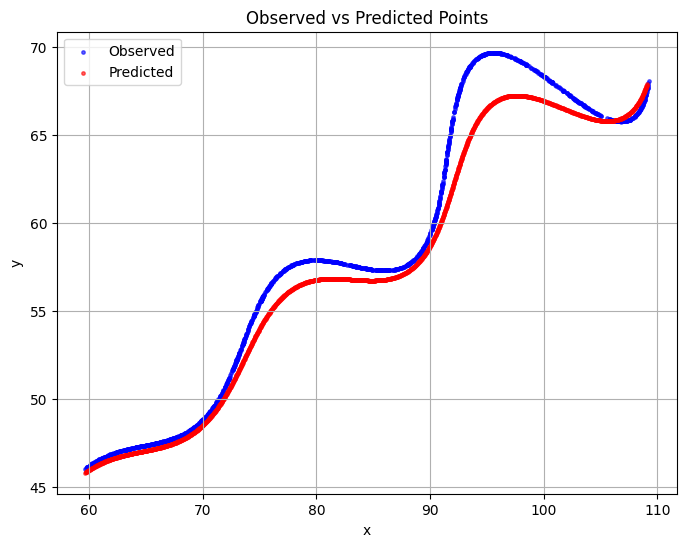

In [9]:
# --- Step 10: Plot Results ---
plt.figure(figsize=(8,6))
plt.scatter(x_obs, y_obs, s=6, color='blue', alpha=0.6, label='Observed')
plt.scatter(x_pred, y_pred, s=6, color='red', alpha=0.6, label='Predicted')
plt.legend()
plt.title('Observed vs Predicted Points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

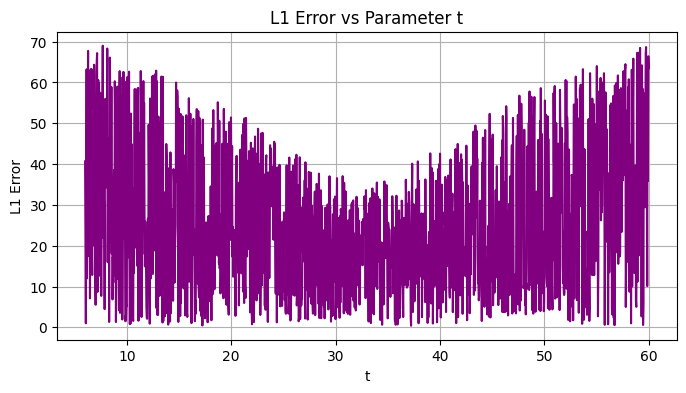

In [10]:
# --- Step 11: Plot L1 Error vs t ---
plt.figure(figsize=(8,4))
plt.plot(t_vals, abs_errors, color='purple')
plt.title('L1 Error vs Parameter t')
plt.xlabel('t')
plt.ylabel('L1 Error')
plt.grid(True)
plt.show()

In [11]:
# --- Step 13: Final Equation (for README or Desmos) ---
print("\n--- Final Parametric Equation ---")
print(f'( t*cos({theta_opt:.9f}) - exp({M_opt:.9f}*|t|)*sin(0.3*t)*sin({theta_opt:.9f}) + {X_opt:.6f},  42 + t*sin({theta_opt:.9f}) + exp({M_opt:.9f}*|t|)*sin(0.3*t)*cos({theta_opt:.9f}) )')


--- Final Parametric Equation ---
( t*cos(0.490759228) - exp(0.021388956*|t|)*sin(0.3*t)*sin(0.490759228) + 54.900151,  42 + t*sin(0.490759228) + exp(0.021388956*|t|)*sin(0.3*t)*cos(0.490759228) )
